<a href="https://colab.research.google.com/github/slvDev/Digit-Recognizer-CNN-Keras/blob/master/Digit_Recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from random import randrange

In [0]:
df_train = pd.read_csv('/content/train.csv')
print(f'The train set contain {df_train.shape[0]} examples')
df_train.head(3)


The train set contain 42000 examples


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test = pd.read_csv('/content/test.csv')
print(f'The test set contain {test.shape[0]} examples')
test.head(3)

The test set contain 28000 examples


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = df_train.drop('label', axis = 1)
y_train = df_train['label']

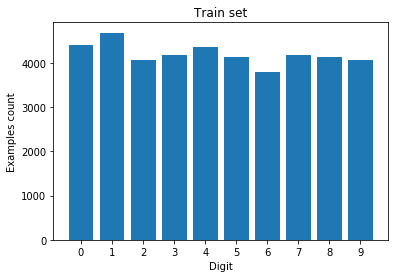

In [0]:
digits = y_train.unique()
values = y_train.value_counts()

plt.bar(digits, values)
plt.title('Train set')
plt.xlabel('Digit')
plt.ylabel('Examples count')
plt.xticks(np.arange(len(digits)))
plt.show()

In [0]:
#X_train = X_train / 255
#test = test / 255

In [0]:
X_train = normalize(X_train)
test = normalize(test)

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

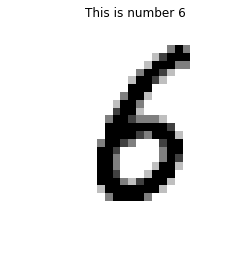

In [0]:
rnd_digit = randrange(X_train.shape[0])
img = X_train[rnd_digit][:,:,0]
label = y_train[rnd_digit]
plt.title(f'This is number {label}')
plt.axis('off')
plt.imshow(img, cmap=plt.cm.binary)

In [0]:
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5)

In [0]:
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        rotation_range=20,
        zoom_range = 0.2, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        )

#val_datagen = ImageDataGenerator()

In [0]:
train_datagen.fit(X_train)
#val_datagen.fit(X_val)
#test_datagen.fit(X_test)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.5),
        
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
model.summary()

In [0]:
batch_size = 32
history = model.fit_generator(
        train_datagen.flow(X_train, y_train, batch_size=batch_size),
        epochs=50,
        validation_data=(X_val, y_val),
        )

Epoch 1/50
1050/1050 [==============================] - 31s 29ms/step - loss: 1.0229 - acc: 0.6797 - val_loss: 0.1181 - val_acc: 0.9583
Epoch 2/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.3718 - acc: 0.8826 - val_loss: 0.2609 - val_acc: 0.9129
Epoch 3/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.2798 - acc: 0.9129 - val_loss: 0.1281 - val_acc: 0.9612
Epoch 4/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.2323 - acc: 0.9284 - val_loss: 0.0492 - val_acc: 0.9824
Epoch 5/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.2042 - acc: 0.9373 - val_loss: 0.1993 - val_acc: 0.9464
Epoch 6/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1908 - acc: 0.9429 - val_loss: 0.0602 - val_acc: 0.9805
Epoch 7/50
1050/1050 [==============================] - 18s 17ms/step - loss: 0.1708 - acc: 0.9478 - val_loss: 0.0877 - val_acc: 0.9719
Epoch 8/50
1050/1050 [==========================

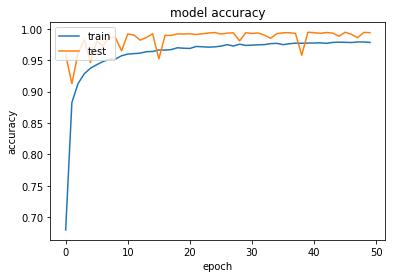

In [262]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

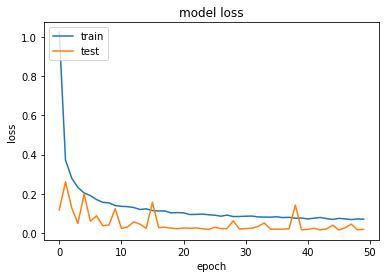

In [263]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [264]:
model.evaluate(X_test, y_test)

4200/4200 [==============================] - 1s 146us/sample - loss: 0.0245 - acc: 0.9921


[0.024458185520310333, 0.99214286]

In [265]:
#y_pred = model.predict_generator(test_datagen.flow(X_test, y_test, batch_size=batch_size))
#X_test = normalize(X_test, axis = 0)
y_pred = model.predict(X_test)
y_pred_cl = np.argmax(y_pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)

confusion_matrix(y_true, y_pred_cl)


array([[422,   0,   0,   0,   0,   0,   0,   0,   3,   0],
       [  0, 486,   0,   0,   0,   0,   0,   2,   1,   1],
       [  0,   0, 402,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   2, 419,   0,   1,   0,   0,   3,   1],
       [  0,   1,   0,   0, 391,   0,   1,   0,   0,   4],
       [  1,   0,   0,   2,   0, 340,   2,   0,   1,   2],
       [  0,   0,   0,   0,   0,   0, 429,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0,   0, 434,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0, 435,   1],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0, 409]])